## 1. 单品种单策略_MA_DoubleCross

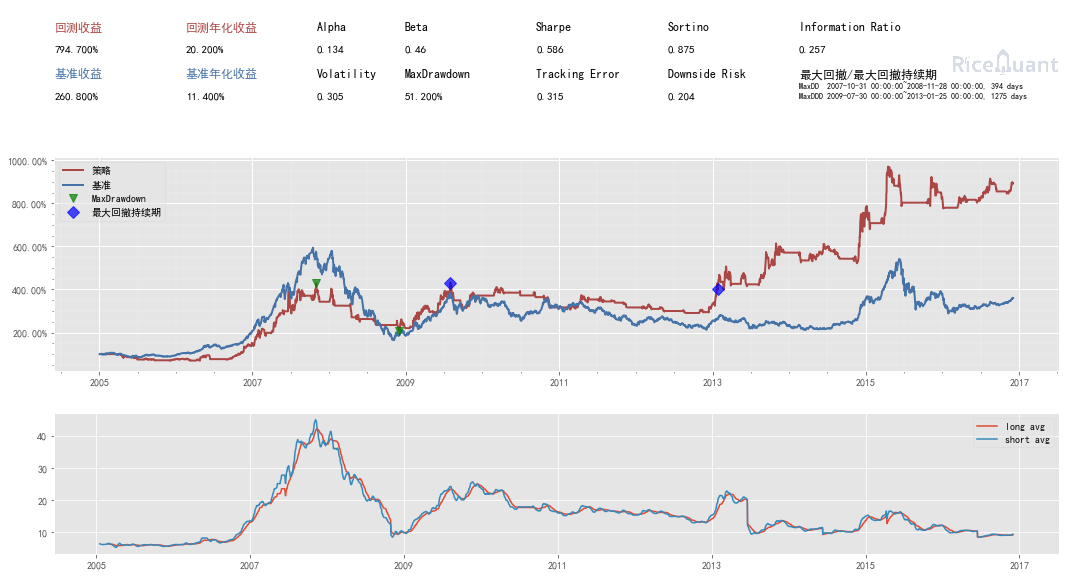

In [1]:
#coding=utf-8
# run_code_demo
from rqalpha import run_code

code = """
import rqalpha
from rqalpha.api import *
import talib

def init(context):
    context.s1 = "000001.XSHE"
    context.SHORTPERIOD = 10
    context.LONGPERIOD = 30


def handle_bar(context, bar_dict):

    prices = history_bars(context.s1, context.LONGPERIOD+1, '1d', 'close')

    short_avg = talib.SMA(prices, context.SHORTPERIOD)
    long_avg = talib.SMA(prices, context.LONGPERIOD)

    plot("short avg", short_avg[-1])
    plot("long avg", long_avg[-1])

    # 计算现在portfolio中股票的仓位
    cur_position = context.portfolio.positions[context.s1].quantity
    # 计算现在portfolio中的现金可以购买多少股票
    shares = context.portfolio.cash/bar_dict[context.s1].close

    # 如果短均线从上往下跌破长均线，也就是在目前的bar短线平均值低于长线平均值，而上一个bar的短线平均值高于长线平均值
    if short_avg[-1] - long_avg[-1] < 0 and short_avg[-2] - long_avg[-2] > 0 and cur_position > 0:
        # 进行清仓
        order_target_value(context.s1, 0)

    # 如果短均线从下往上突破长均线，为入场信号
    if short_avg[-1] - long_avg[-1] > 0 and short_avg[-2] - long_avg[-2] < 0:
        # 满仓入股
        order_shares(context.s1, shares)
"""

config = {
  "base": {
    "start_date": "2000-06-01",
    "end_date": "2016-12-01",
    "securities": ['stock'],
    "stock_starting_cash": 100000,
    "benchmark": "000300.XSHG"
#     "strategy_file_path": os.path.abspath(__file__)
  },
  "extra": {
    "log_level": "verbose",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True
    }
  }
}

# 您可以指定您要传递的参数
run_code(code, config)

## 2. 等仓位多品种单策略

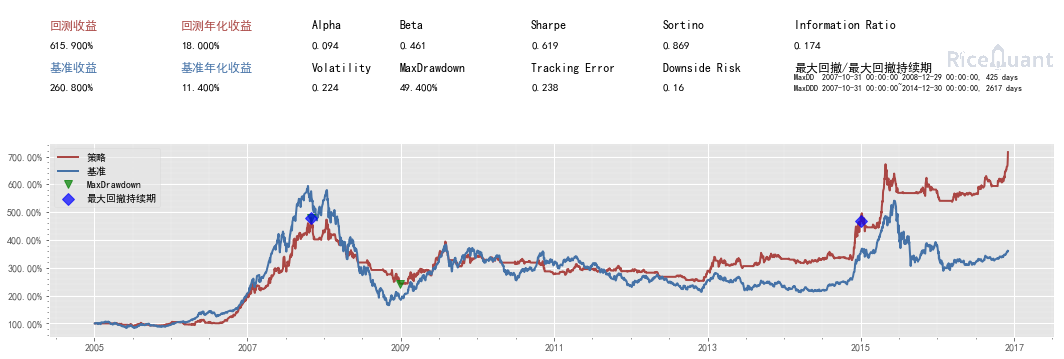

{'sys_analyser': {'benchmark_portfolio':               cash  market_value  static_unit_net_value  total_value  \
  date                                                                   
  2005-01-04  738.21      99261.79                  1.000    100000.00   
  2005-01-05  738.21     100248.56                  1.000    100986.77   
  2005-01-06  738.21      99300.17                  1.010    100038.38   
  2005-01-07  738.21      99379.96                  1.000    100118.17   
  2005-01-10  738.21     100381.88                  1.001    101120.09   
  2005-01-11  738.21     100711.14                  1.011    101449.35   
  2005-01-12  738.21     100671.75                  1.014    101409.96   
  2005-01-13  738.21     100684.88                  1.014    101423.09   
  2005-01-14  738.21      99819.31                  1.014    100557.52   
  2005-01-17  738.21      97712.45                  1.006     98450.66   
  2005-01-18  738.21      98443.69                  0.985     99181.90   

In [2]:
#coding=utf-8
# run_code_demo
from rqalpha import run_code

code = """
from rqalpha.api import *
import talib

def init(context):
    context.s1 = "000001.XSHE"
    context.s2 = "600036.XSHG"
    context.s3 = "600050.XSHG"
    context.stocks = [context.s1, context.s2, context.s3] #建立股票池的列表
    context.SHORTPERIOD = 10
    context.LONGPERIOD = 30
    context.order_percent = 1.0/len(context.stocks) #计算平均权重

def handle_bar(context, bar_dict):
    for stocks in context.stocks:
        prices = history_bars(stocks, context.LONGPERIOD+1, '1d', 'close')
        short_avg = talib.SMA(prices, context.SHORTPERIOD)
        long_avg = talib.SMA(prices, context.LONGPERIOD)

        cur_position = context.portfolio.positions[stocks].quantity
        if short_avg[-1] - long_avg[-1] < 0 and short_avg[-2] - long_avg[-2] > 0 and cur_position > 0:
            order_target_value(stocks, 0)

        if short_avg[-1] - long_avg[-1] > 0 and short_avg[-2] - long_avg[-2] < 0:
            order_target_percent(stocks, context.order_percent)
"""

config = {
  "base": {
    "start_date": "2000-06-01",
    "end_date": "2016-12-01",
    "securities": ['stock'],
    "stock_starting_cash": 100000,
    "benchmark": "000300.XSHG"
#     "strategy_file_path": os.path.abspath(__file__)
  },
  "extra": {
    "log_level": "verbose",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True
    }
  }
}

# 您可以指定您要传递的参数
run_code(code, config)

## 3. 等仓位多品种单策略加止损

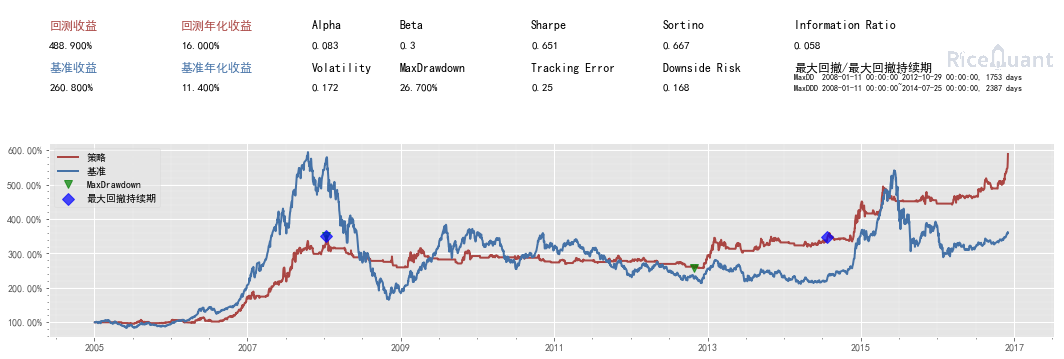

{'sys_analyser': {'benchmark_portfolio':               cash  market_value  static_unit_net_value  total_value  \
  date                                                                   
  2005-01-04  738.21      99261.79                  1.000    100000.00   
  2005-01-05  738.21     100248.56                  1.000    100986.77   
  2005-01-06  738.21      99300.17                  1.010    100038.38   
  2005-01-07  738.21      99379.96                  1.000    100118.17   
  2005-01-10  738.21     100381.88                  1.001    101120.09   
  2005-01-11  738.21     100711.14                  1.011    101449.35   
  2005-01-12  738.21     100671.75                  1.014    101409.96   
  2005-01-13  738.21     100684.88                  1.014    101423.09   
  2005-01-14  738.21      99819.31                  1.014    100557.52   
  2005-01-17  738.21      97712.45                  1.006     98450.66   
  2005-01-18  738.21      98443.69                  0.985     99181.90   

In [3]:
#coding=utf-8
# run_code_demo
from rqalpha import run_code

code = """
import rqalpha
from rqalpha.api import *
import talib

def init(context):
    context.s1 = "000001.XSHE"
    context.s2 = "600036.XSHG"
    context.s3 = "600050.XSHG"
    context.stocks = [context.s1, context.s2, context.s3]
    context.SHORTPERIOD = 10
    context.LONGPERIOD = 30
    context.order_percent = 1.0/len(context.stocks)
    context.stoplossmultipler= 0.98 #止损 乘数 
    context.takepofitmultipler= 3 #止盈 乘数
    
def handle_bar(context, bar_dict):
    entry_exit(context, bar_dict)
    stop_loss(context, bar_dict)
    
    
def stop_loss(context,bar_dict):
    for stock in context.portfolio.positions:
        if bar_dict[stock].last<context.portfolio.positions[stock].avg_price*context.stoplossmultipler:# 现价低于 原价一定比例
            order_target_percent(stock,0)
        elif bar_dict[stock].last>context.portfolio.positions[stock].avg_price*context.takepofitmultipler:# 现价高于原价一定比例
            order_target_percent(stock,0)

def entry_exit(context, bar_dict):
    for stocks in context.stocks:
        prices = history_bars(stocks, context.LONGPERIOD+1, '1d', 'close')
        short_avg = talib.SMA(prices, context.SHORTPERIOD)
        long_avg = talib.SMA(prices, context.LONGPERIOD)

        cur_position = context.portfolio.positions[stocks].quantity

        if short_avg[-1] - long_avg[-1] < 0 and short_avg[-2] - long_avg[-2] > 0 and cur_position > 0:
            order_target_value(stocks, 0)

        if short_avg[-1] - long_avg[-1] > 0 and short_avg[-2] - long_avg[-2] < 0:
            order_target_percent(stocks, context.order_percent)
"""

config = {
  "base": {
    "start_date": "2000-06-01",
    "end_date": "2016-12-01",
    "securities": ['stock'],
    "stock_starting_cash": 100000,
    "benchmark": "000300.XSHG"
#     "strategy_file_path": os.path.abspath(__file__)
  },
  "extra": {
    "log_level": "verbose",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True
    }
  }
}

# 您可以指定您要传递的参数
run_code(code, config)

## 4. 优化权重的投资组合

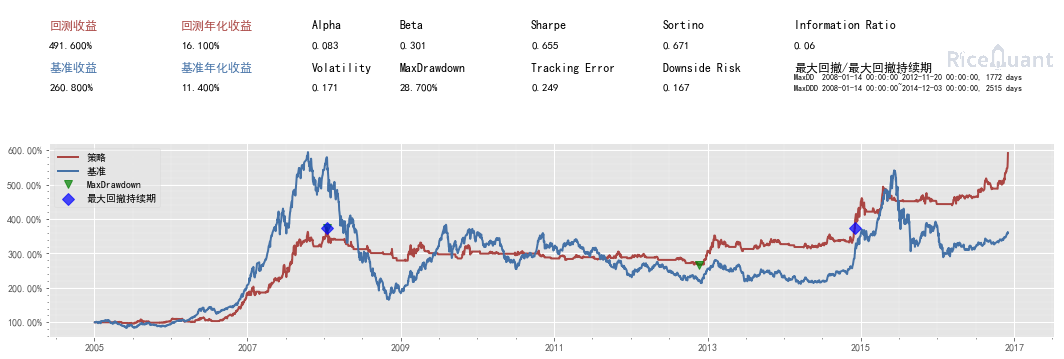

{'sys_analyser': {'benchmark_portfolio':               cash  market_value  static_unit_net_value  total_value  \
  date                                                                   
  2005-01-04  738.21      99261.79                  1.000    100000.00   
  2005-01-05  738.21     100248.56                  1.000    100986.77   
  2005-01-06  738.21      99300.17                  1.010    100038.38   
  2005-01-07  738.21      99379.96                  1.000    100118.17   
  2005-01-10  738.21     100381.88                  1.001    101120.09   
  2005-01-11  738.21     100711.14                  1.011    101449.35   
  2005-01-12  738.21     100671.75                  1.014    101409.96   
  2005-01-13  738.21     100684.88                  1.014    101423.09   
  2005-01-14  738.21      99819.31                  1.014    100557.52   
  2005-01-17  738.21      97712.45                  1.006     98450.66   
  2005-01-18  738.21      98443.69                  0.985     99181.90   

In [32]:
#coding=utf-8
# run_code_demo
from rqalpha import run_code

code = """
from rqalpha.api import *
import talib

def init(context):
    context.s1 = "000001.XSHE"
    context.s2 = "600036.XSHG"
    context.s3 = "600050.XSHG"
    context.stocks = {context.s1: 0.25,
                      context.s2: 0.4,
                      context.s3: 0.35}
    context.SHORTPERIOD = 10
    context.LONGPERIOD = 30
    context.stoplossmultipler= 0.98 #止损 乘数 
    context.takepofitmultipler= 3 #止盈 乘数

def stop_loss(context,bar_dict):
    for stock in context.portfolio.positions:
        if bar_dict[stock].last<context.portfolio.positions[stock].avg_price*context.stoplossmultipler:# 现价低于 原价一定比例
            order_target_percent(stock,0)
        elif bar_dict[stock].last>context.portfolio.positions[stock].avg_price*context.takepofitmultipler:# 现价高于原价一定比例
            order_target_percent(stock,0)

def handle_bar(context, bar_dict):
    stop_loss(context,bar_dict)
    for stocks, target in context.stocks.items():
        prices = history_bars(stocks, context.LONGPERIOD+1, '1d', 'close')
        short_avg = talib.SMA(prices, context.SHORTPERIOD)
        long_avg = talib.SMA(prices, context.LONGPERIOD)

        cur_position = context.portfolio.positions[stocks].quantity
        if short_avg[-1] - long_avg[-1] < 0 and short_avg[-2] - long_avg[-2] > 0 and cur_position > 0:
            order_target_value(stocks, 0)

        if short_avg[-1] - long_avg[-1] > 0 and short_avg[-2] - long_avg[-2] < 0:
            order_target_percent(stocks, target)
"""

config = {
  "base": {
    "start_date": "2000-06-01",
    "end_date": "2016-12-01",
    "securities": ['stock'],
    "stock_starting_cash": 100000,
    "benchmark": "000300.XSHG"
#     "strategy_file_path": os.path.abspath(__file__)
  },
  "extra": {
    "log_level": "verbose",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True
    }
  }
}

# 您可以指定您要传递的参数
run_code(code, config)